<a href="https://colab.research.google.com/github/yjoonjang/text-mining/blob/main/2-1.%20%ED%85%8D%EC%8A%A4%ED%8A%B8_%ED%91%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [ ]:
# 단어 수 기준(TF) 벡터화
vectorizer = CountVectorizer(min_df = 1, ngram_range = (1,1)) # min_df: 적어도 등장하는 횟수. ngram: 묶이는 단어의 수

In [ ]:
# 코퍼스 구축
corpus = ['이해 쏙쏙 텍스트마이닝 정말 정말 재미있어요.',
          '저도 이해 쏙쏙 텍스트마이닝 재미있는 것 같아요.',
          '저는 얼른 밥 먹으러 가고 싶어요.',
          '저는 집에 가고 싶어요.']

In [ ]:
# feature(여기에서는 단어 기준) 추출
features = vectorizer.fit_transform(corpus)
print(features)

# sparse array

  (0, 6)	1
  (0, 4)	1
  (0, 13)	1
  (0, 11)	2
  (0, 8)	1
  (1, 6)	1
  (1, 4)	1
  (1, 13)	1
  (1, 10)	1
  (1, 7)	1
  (1, 1)	1
  (2, 9)	1
  (2, 5)	1
  (2, 2)	1
  (2, 0)	1
  (2, 3)	1
  (3, 9)	1
  (3, 0)	1
  (3, 3)	1
  (3, 12)	1


In [ ]:
# dense array로 변환
features.todense()

matrix([[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 1],
        [0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1],
        [1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]])

In [ ]:
# DTM(Document Term Matrix) 만들기
dtm_np = np.array(features.todense())
print(dtm_np)

[[0 0 0 0 1 0 1 0 1 0 0 2 0 1]
 [0 1 0 0 1 0 1 1 0 0 1 0 0 1]
 [1 0 1 1 0 1 0 0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 1 0 0 1 0]]


In [ ]:
# feature 이름 불러오기
feature_names = vectorizer.get_feature_names_out()
print(feature_names)

['가고' '같아요' '먹으러' '싶어요' '쏙쏙' '얼른' '이해' '재미있는' '재미있어요' '저는' '저도' '정말' '집에'
 '텍스트마이닝']


In [ ]:
# DataFrame 생성
pd.DataFrame(data = dtm_np, columns = feature_names)

,가고,같아요,먹으러,싶어요,쏙쏙,얼른,이해,재미있는,재미있어요,저는,저도,정말,집에,텍스트마이닝
0,0,0,0,0,1,0,1,0,1,0,0,2,0,1
1,0,1,0,0,1,0,1,1,0,0,1,0,0,1
2,1,0,1,1,0,1,0,0,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0,1,0


In [ ]:
# 유클리다안 유사도 구하기
print(np.linalg.norm(dtm_np[1]-dtm_np[0]))
print(np.linalg.norm(dtm_np[2]-dtm_np[0]))

2.8284271247461903
3.605551275463989


In [ ]:
# 모든 유클리디안 거리 유사도 구하기
euclidian_distance_similarity = []
for k in range(4):
    for i in range(4):
        euclidian_distance = np.linalg.norm(dtm_np[k]-dtm_np[i])
        euclidian_distance_similarity.append(euclidian_distance)
        print(euclidian_distance)

0.0
2.8284271247461903
3.605551275463989
3.4641016151377544
2.8284271247461903
0.0
3.3166247903554
3.1622776601683795
3.605551275463989
3.3166247903554
0.0
1.7320508075688772
3.4641016151377544
3.1622776601683795
1.7320508075688772
0.0


In [ ]:
# 유클리디안 거리 유사도 4X4 행렬로 변환
ud_np = np.array(euclidian_distance_similarity)
ud_np.reshape([4,4])

array([[0.        , 2.82842712, 3.60555128, 3.46410162],
       [2.82842712, 0.        , 3.31662479, 3.16227766],
       [3.60555128, 3.31662479, 0.        , 1.73205081],
       [3.46410162, 3.16227766, 1.73205081, 0.        ]])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

<Axes: >

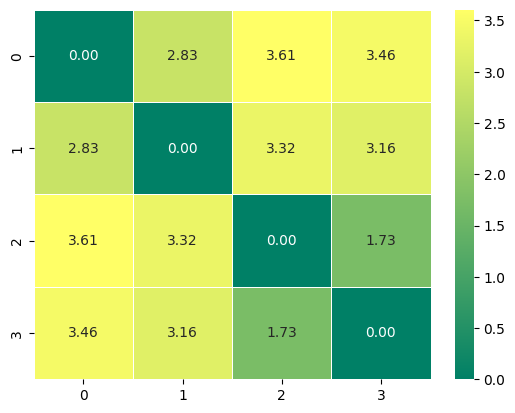

In [ ]:
# 히트맵 시각화
# sns.set(rc={'figure.figsize':(10,10)}) 사진 크기
sns.heatmap(data = ud_np.reshape([4,4]),annot = True, fmt = '.2f', linewidths=.5, cmap = 'summer')

In [ ]:
# 모든 코사인 유사도 구하기
cosine_similarity = []
for k in range(4):
    for i in range(4):
        cosine = np.dot(dtm_np[k],dtm_np[i])/(np.linalg.norm(dtm_np[k])*np.linalg.norm(dtm_np[i]))
        cosine_similarity.append(cosine)
        print(cosine)

0.9999999999999998
0.43301270189221935
0.0
0.0
0.43301270189221935
1.0000000000000002
0.0
0.0
0.0
0.0
0.9999999999999998
0.6708203932499369
0.0
0.0
0.6708203932499369
1.0


In [ ]:
# 코사인 유사도 4X4 행렬 구하기
cs_np = np.array(cosine_similarity)
cs_np.reshape(4,4)

array([[1.        , 0.4330127 , 0.        , 0.        ],
       [0.4330127 , 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.67082039],
       [0.        , 0.        , 0.67082039, 1.        ]])

<Axes: >

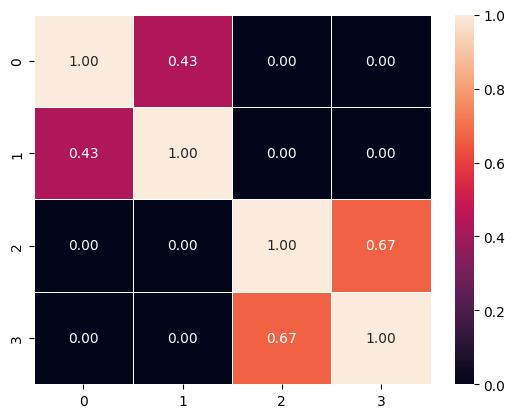

In [ ]:
# 히트맵 시각화
sns.heatmap(data = cs_np.reshape(4,4), annot = True, fmt = '.2f', linewidths=.5)

In [ ]:
# TFIDF 벡터화
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,1))
features = vectorizer.fit_transform(corpus)

In [ ]:
# feature 이름 불러 오기
feature_names = vectorizer.get_feature_names_out()

In [ ]:
# dense array로 변환
features.todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.30091213,
         0.        , 0.30091213, 0.        , 0.38166888, 0.        ,
         0.        , 0.76333776, 0.        , 0.30091213],
        [0.        , 0.4533864 , 0.        , 0.        , 0.35745504,
         0.        , 0.35745504, 0.4533864 , 0.        , 0.        ,
         0.4533864 , 0.        , 0.        , 0.35745504],
        [0.40104275, 0.        , 0.50867187, 0.40104275, 0.        ,
         0.50867187, 0.        , 0.        , 0.        , 0.40104275,
         0.        , 0.        , 0.        , 0.        ],
        [0.46580855, 0.        , 0.        , 0.46580855, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.46580855,
         0.        , 0.        , 0.59081908, 0.        ]])

In [ ]:
# DTM 생성
dtm_np = np.array(features.todense())

In [ ]:
# DataFrame 생성
pd.DataFrame(data = dtm_np, columns = feature_names)

,가고,같아요,먹으러,싶어요,쏙쏙,얼른,이해,재미있는,재미있어요,저는,저도,정말,집에,텍스트마이닝
0,0.000000,0.000000,0.000000,0.000000,0.300912,0.000000,0.300912,0.000000,0.381669,0.000000,0.000000,0.763338,0.000000,0.300912
1,0.000000,0.453386,0.000000,0.000000,0.357455,0.000000,0.357455,0.453386,0.000000,0.000000,0.453386,0.000000,0.000000,0.357455
2,0.401043,0.000000,0.508672,0.401043,0.000000,0.508672,0.000000,0.000000,0.000000,0.401043,0.000000,0.000000,0.000000,0.000000
3,0.465809,0.000000,0.000000,0.465809,0.000000,0.000000,0.000000,0.000000,0.000000,0.465809,0.000000,0.000000,0.590819,0.000000


In [ ]:
# 모든 유클리디안 거리 유사도 구하기
euclidian_distance_similarity = []
for k in range(4):
    for i in range(4):
        euclidian_distance = np.linalg.norm(dtm_np[k]-dtm_np[i])
        euclidian_distance_similarity.append(euclidian_distance)
        print(euclidian_distance)

0.0
1.1638834352400607
1.4142135623730951
1.414213562373095
1.1638834352400607
0.0
1.4142135623730951
1.4142135623730951
1.4142135623730951
1.4142135623730951
0.0
0.9376274101106029
1.414213562373095
1.4142135623730951
0.9376274101106029
0.0


array([[0.        , 1.16388344, 1.41421356, 1.41421356],
       [1.16388344, 0.        , 1.41421356, 1.41421356],
       [1.41421356, 1.41421356, 0.        , 0.93762741],
       [1.41421356, 1.41421356, 0.93762741, 0.        ]])

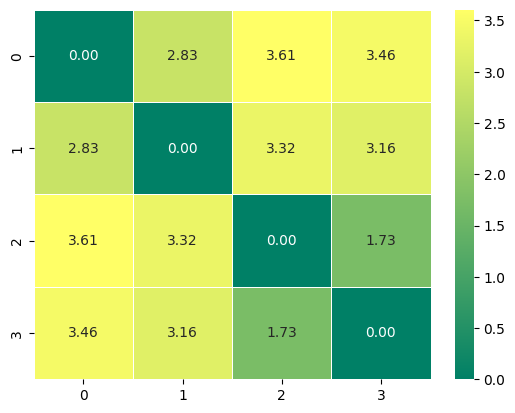

In [ ]:
# 히트맵 시각화
sns.heatmap(data = ud_np.reshape([4,4]),annot = True, fmt = '.2f', linewidths=.5, cmap = 'summer')
ud_np = np.array(euclidian_distance_similarity)
ud_np.reshape([4,4])

In [ ]:
# 코사인 유사도 구하기
print(np.dot(dtm_np[0],dtm_np[1])/(np.linalg.norm(dtm_np[0])*np.linalg.norm(dtm_np[1])))

0.3226876745868979


In [ ]:
# 모든 코사인 유사도 구하기
cosine_similarity = []
for k in range(4):
    for i in range(4):
        cosine = np.dot(dtm_np[k],dtm_np[i])/(np.linalg.norm(dtm_np[k])*np.linalg.norm(dtm_np[i]))
        cosine_similarity.append(cosine)
        print(cosine)

1.0000000000000002
0.3226876745868979
0.0
0.0
0.3226876745868979
1.0
0.0
0.0
0.0
0.0
1.0
0.5604274199046415
0.0
0.0
0.5604274199046415
1.0000000000000002


In [ ]:
# 코사인 유사도 4X4 행렬 구하기
cs_np = np.array(cosine_similarity)
cs_np.reshape(4,4)

array([[1.        , 0.32268767, 0.        , 0.        ],
       [0.32268767, 1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.56042742],
       [0.        , 0.        , 0.56042742, 1.        ]])

<Axes: >

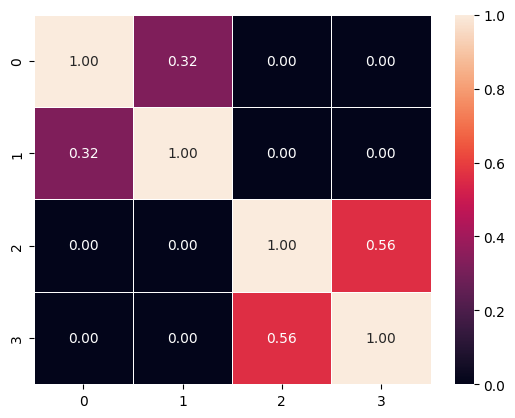

In [ ]:
# 히트맵 시각화
sns.heatmap(data = cs_np.reshape(4,4), annot = True, fmt = '.2f', linewidths=.5)